In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [88]:
df=pd.read_csv('house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
df.shape

(1460, 81)

In [92]:
df.drop(['Id'], axis=1, inplace=True)

 #### Find out how many features are numerical and categorical 

In [93]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [94]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('number of categorical variables: ', len(categorical_features))

df[categorical_features].head()

number of categorical variables:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### how many nan values in numerical and categorical features

In [95]:
df[numerical_features].isnull().mean()


MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float64

In [96]:
df['MasVnrArea'].fillna(value=df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt']=df['GarageYrBlt'].fillna(method='ffill')

<AxesSubplot:>

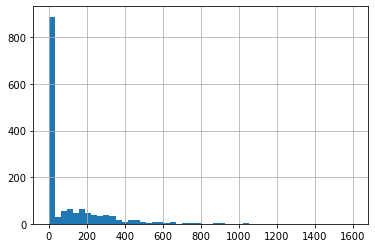

In [11]:
df.MasVnrArea.hist(bins=50)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea'>

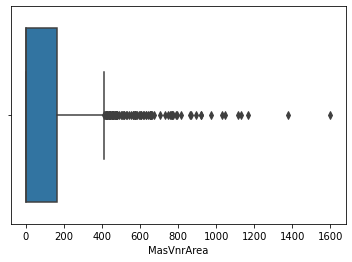

In [12]:
sns.boxplot('MasVnrArea',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageYrBlt'>

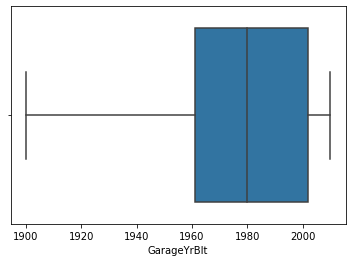

In [13]:
sns.boxplot('GarageYrBlt',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

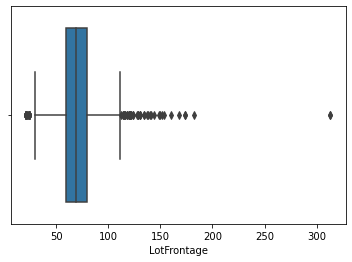

In [14]:
sns.boxplot('LotFrontage',data=df)

In [97]:
df['LotFrontage'].fillna(value=df['LotFrontage'].median(), inplace=True)

In [98]:
df[numerical_features].isnull().mean()

MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

<AxesSubplot:>

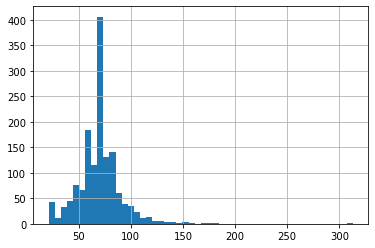

In [10]:
df.LotFrontage.hist(bins=50)

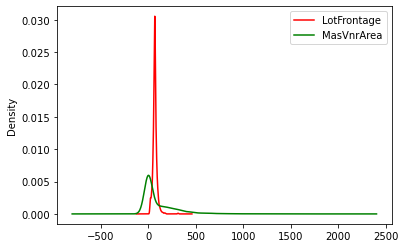

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['LotFrontage'].plot(kind='kde', ax=ax, color='red')
df['MasVnrArea'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [99]:
df[categorical_features].isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [100]:
df['MasVnrType'].fillna(value=df['MasVnrType'].mode()[0], inplace=True)
df['BsmtQual'].fillna(value=df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(value=df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(value=df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(value=df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(value=df['BsmtFinType2'].mode()[0], inplace=True)
df['GarageType'].fillna(value=df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(value=df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(value=df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(value=df['GarageCond'].mode()[0], inplace=True)
df['Electrical'].fillna(value=df['Electrical'].mode()[0], inplace=True)





In [101]:
df[categorical_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType          0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [102]:
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [103]:
for feature in ['BsmtQual','FireplaceQu','GarageType','Alley','PoolQC','Fence','MiscFeature']:
    impute_nan(df,feature)

In [104]:
df[categorical_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

<AxesSubplot:>

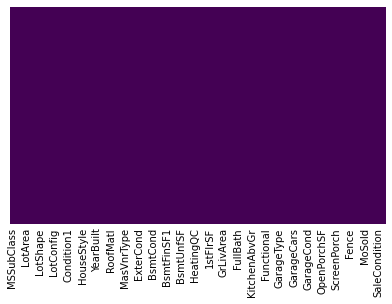

In [55]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Handle categorical data       

In [105]:
df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [106]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [109]:
df['MSZoning']=le.fit_transform(df['MSZoning'])

In [110]:
df.drop(['Pave'], axis=1, inplace=True)

KeyError: "['Pave'] not found in axis"

In [111]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,20,3,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,60,3,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,70,3,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,60,3,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [112]:
alley=pd.get_dummies(df['Alley'],drop_first=True)

In [25]:
df.drop(['Alley'], axis=1, inplace=True)

KeyError: "['Alley'] not found in axis"

In [113]:
df=pd.concat([df,alley],axis=1)

In [27]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,20,3,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,60,3,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,70,3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,60,3,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [114]:
df['LotShape']=le.fit_transform(df['LotShape'])

In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,Pave,3,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,20,3,80.0,9600,Pave,3,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,60,3,68.0,11250,Pave,0,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,70,3,60.0,9550,Pave,0,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,60,3,84.0,14260,Pave,0,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [115]:
df['SaleCondition']=le.fit_transform(df['SaleCondition'])

In [116]:
df['SaleCondition'].unique()

array([4, 0, 5, 1, 2, 3])

In [117]:
def cat_encoder(df,variable):
    df[variable]=le.fit_transform(df[variable])
    

In [118]:
for feature in ['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']:
    cat_encoder(df, feature)
    

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,Pave,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,3,3,2,706,5,0,150,856,GasA,0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,Attchd,2003.0,RFn,2,548,4,4,Y,0,61,0,0,0,0,3,2,Missing,0,2,2008,WD,4,208500
1,20,3,80.0,9600,Pave,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,3,1,0,978,5,0,284,1262,GasA,0,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,Attchd,1976.0,RFn,2,460,4,4,Y,298,0,0,0,0,0,3,2,Missing,0,5,2007,WD,4,181500
2,60,3,68.0,11250,Pave,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,3,2,2,486,5,0,434,920,GasA,0,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,Attchd,2001.0,RFn,2,608,4,4,Y,0,42,0,0,0,0,3,2,Missing,0,9,2008,WD,4,223500
3,70,3,60.0,9550,Pave,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,1,3,0,216,5,0,540,756,GasA,2,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,Detchd,1998.0,Unf,3,642,4,4,Y,0,35,272,0,0,0,3,2,Missing,0,2,2006,WD,0,140000
4,60,3,84.0,14260,Pave,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,3,0,2,655,5,0,490,1145,GasA,0,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,Attchd,2000.0,RFn,3,836,4,4,Y,192,84,0,0,0,0,3,2,Missing,0,12,2008,WD,4,250000


In [119]:
street=pd.get_dummies(df['Street'],drop_first=True)

In [120]:
df.drop(['Street'], axis=1, inplace=True)

In [121]:
df=pd.concat([df,street],axis=1)

In [38]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pave
0,60,3,65.0,8450,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,3,3,2,706,5,0,150,856,GasA,0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,Attchd,2003.0,RFn,2,548,4,4,Y,0,61,0,0,0,0,3,2,Missing,0,2,2008,WD,4,208500,1
1,20,3,80.0,9600,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,3,1,0,978,5,0,284,1262,GasA,0,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,Attchd,1976.0,RFn,2,460,4,4,Y,298,0,0,0,0,0,3,2,Missing,0,5,2007,WD,4,181500,1
2,60,3,68.0,11250,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,3,2,2,486,5,0,434,920,GasA,0,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,Attchd,2001.0,RFn,2,608,4,4,Y,0,42,0,0,0,0,3,2,Missing,0,9,2008,WD,4,223500,1
3,70,3,60.0,9550,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,1,3,0,216,5,0,540,756,GasA,2,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,Detchd,1998.0,Unf,3,642,4,4,Y,0,35,272,0,0,0,3,2,Missing,0,2,2006,WD,0,140000,1
4,60,3,84.0,14260,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,3,0,2,655,5,0,490,1145,GasA,0,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,Attchd,2000.0,RFn,3,836,4,4,Y,192,84,0,0,0,0,3,2,Missing,0,12,2008,WD,4,250000,1


In [122]:
def cat_onehot(df,variable):
    variable_new = pd.get_dummies(df[variable],drop_first=True)
    df.drop([variable], axis=1, inplace=True)
    df=pd.concat([df,variable_new],axis=1)
    

In [123]:
for feature in ['LandContour','Utilities','LotConfig','BldgType','RoofStyle','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','GarageFinish','PavedDrive','MiscFeature']:
    cat_onehot(df,feature)

In [41]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pave
0,60,3,65.0,8450,3,0,CollgCr,Norm,Norm,2Story,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1
1,20,3,80.0,9600,3,0,Veenker,Feedr,Norm,1Story,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1
2,60,3,68.0,11250,0,0,CollgCr,Norm,Norm,2Story,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1
3,70,3,60.0,9550,0,0,Crawfor,Norm,Norm,2Story,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1
4,60,3,84.0,14260,0,0,NoRidge,Norm,Norm,2Story,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1


In [42]:
df.shape

(1460, 65)

In [43]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pave
0,60,3,65.0,8450,3,0,CollgCr,Norm,Norm,2Story,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1
1,20,3,80.0,9600,3,0,Veenker,Feedr,Norm,1Story,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1
2,60,3,68.0,11250,0,0,CollgCr,Norm,Norm,2Story,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1
3,70,3,60.0,9550,0,0,Crawfor,Norm,Norm,2Story,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1
4,60,3,84.0,14260,0,0,NoRidge,Norm,Norm,2Story,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1


In [124]:
df['Neighborhood'].isnull().sum()

0

In [125]:
df.drop(['Neighborhood','Condition1'], axis=1, inplace=True)

In [80]:

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave
0,60,3,65.0,8450,3,0,Norm,2Story,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1
1,20,3,80.0,9600,3,0,Norm,1Story,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1
2,60,3,68.0,11250,0,0,Norm,2Story,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1
3,70,3,60.0,9550,0,0,Norm,2Story,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1
4,60,3,84.0,14260,0,0,Norm,2Story,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1


In [126]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [77]:
ordinal_index=df.groupby(['Condition2'])['SalePrice'].mean().sort_values().index
ordinal_index

KeyError: 'Condition2'

In [127]:
ordinal_label={k:i for i,k in enumerate(ordinal_index,0)}
ordinal_label

{'RRNn': 0,
 'Artery': 1,
 'Feedr': 2,
 'RRAn': 3,
 'Norm': 4,
 'RRAe': 5,
 'PosN': 6,
 'PosA': 7}

In [128]:
df['con_ordinal_label']=df['Condition2'].map(ordinal_label)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label
0,60,3,65.0,8450,Missing,3,0,Norm,2Story,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4
1,20,3,80.0,9600,Missing,3,0,Norm,1Story,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4
2,60,3,68.0,11250,Missing,0,0,Norm,2Story,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4
3,70,3,60.0,9550,Missing,0,0,Norm,2Story,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4
4,60,3,84.0,14260,Missing,0,0,Norm,2Story,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4


In [129]:
df.drop(['Condition2'], axis=1, inplace=True)

In [86]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label
0,60,3,65.0,8450,3,0,2Story,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4
1,20,3,80.0,9600,3,0,1Story,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4
2,60,3,68.0,11250,0,0,2Story,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4
3,70,3,60.0,9550,0,0,2Story,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4
4,60,3,84.0,14260,0,0,2Story,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4


In [130]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [131]:
house_map=df['HouseStyle'].value_counts().to_dict()

In [89]:
house_map

{'1Story': 726,
 '2Story': 445,
 '1.5Fin': 154,
 'SLvl': 65,
 'SFoyer': 37,
 '1.5Unf': 14,
 '2.5Unf': 11,
 '2.5Fin': 8}

In [132]:
df['HouseStyle']=df['HouseStyle'].map(house_map)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label
0,60,3,65.0,8450,Missing,3,0,445,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4
1,20,3,80.0,9600,Missing,3,0,726,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4
2,60,3,68.0,11250,Missing,0,0,445,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4
3,70,3,60.0,9550,Missing,0,0,445,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4
4,60,3,84.0,14260,Missing,0,0,445,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4


In [133]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [134]:
mean_ordinal=df.groupby(['RoofMatl'])['SalePrice'].mean().to_dict()
mean_ordinal

{'ClyTile': 160000.0,
 'CompShg': 179803.6792189679,
 'Membran': 241500.0,
 'Metal': 180000.0,
 'Roll': 137000.0,
 'Tar&Grv': 185406.36363636365,
 'WdShake': 241400.0,
 'WdShngl': 390250.0}

In [135]:
df['roof_mean_ordinal']=df['RoofMatl'].map(mean_ordinal)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal
0,60,3,65.0,8450,Missing,3,0,445,6,4,2003,2003,CompShg,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4,179803.679219
1,20,3,80.0,9600,Missing,3,0,726,5,7,1976,1976,CompShg,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4,179803.679219
2,60,3,68.0,11250,Missing,0,0,445,6,4,2001,2002,CompShg,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4,179803.679219
3,70,3,60.0,9550,Missing,0,0,445,6,4,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4,179803.679219
4,60,3,84.0,14260,Missing,0,0,445,7,4,2000,2000,CompShg,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4,179803.679219


In [136]:
df.drop(['RoofMatl'], axis=1, inplace=True)

In [95]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal
0,60,3,65.0,8450,3,0,445,6,4,2003,2003,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4,179803.679219
1,20,3,80.0,9600,3,0,726,5,7,1976,1976,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4,179803.679219
2,60,3,68.0,11250,0,0,445,6,4,2001,2002,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4,179803.679219
3,70,3,60.0,9550,0,0,445,6,4,1915,1970,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4,179803.679219
4,60,3,84.0,14260,0,0,445,7,4,2000,2000,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4,179803.679219


In [137]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [138]:
ordinal2_index=df.groupby(['Exterior1st'])['SalePrice'].mean().sort_values().index
ordinal2_index

Index(['BrkComm', 'AsphShn', 'CBlock', 'AsbShng', 'MetalSd', 'Wd Sdng',
       'WdShing', 'Stucco', 'HdBoard', 'Plywood', 'BrkFace', 'VinylSd',
       'CemntBd', 'Stone', 'ImStucc'],
      dtype='object', name='Exterior1st')

In [139]:
ordinal2_label={k:i for i,k in enumerate(ordinal2_index,0)}
ordinal2_label

{'BrkComm': 0,
 'AsphShn': 1,
 'CBlock': 2,
 'AsbShng': 3,
 'MetalSd': 4,
 'Wd Sdng': 5,
 'WdShing': 6,
 'Stucco': 7,
 'HdBoard': 8,
 'Plywood': 9,
 'BrkFace': 10,
 'VinylSd': 11,
 'CemntBd': 12,
 'Stone': 13,
 'ImStucc': 14}

In [140]:
df['ex_ordinal_label']=df['Exterior1st'].map(ordinal2_label)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal,ex_ordinal_label
0,60,3,65.0,8450,Missing,3,0,445,6,4,2003,2003,VinylSd,VinylSd,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4,179803.679219,11
1,20,3,80.0,9600,Missing,3,0,726,5,7,1976,1976,MetalSd,MetalSd,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4,179803.679219,4
2,60,3,68.0,11250,Missing,0,0,445,6,4,2001,2002,VinylSd,VinylSd,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4,179803.679219,11
3,70,3,60.0,9550,Missing,0,0,445,6,4,1915,1970,Wd Sdng,Wd Shng,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4,179803.679219,5
4,60,3,84.0,14260,Missing,0,0,445,7,4,2000,2000,VinylSd,VinylSd,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4,179803.679219,11


In [141]:
df.drop(['Exterior1st'], axis=1, inplace=True)

In [142]:
df.drop(['Exterior2nd'], axis=1, inplace=True)

In [102]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal,ex_ordinal_label
0,60,3,65.0,8450,3,0,445,6,4,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4,179803.679219,11
1,20,3,80.0,9600,3,0,726,5,7,1976,1976,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4,179803.679219,4
2,60,3,68.0,11250,0,0,445,6,4,2001,2002,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4,179803.679219,11
3,70,3,60.0,9550,0,0,445,6,4,1915,1970,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4,179803.679219,5
4,60,3,84.0,14260,0,0,445,7,4,2000,2000,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4,179803.679219,11


In [143]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [144]:
mean2_ordinal=df.groupby(['Functional'])['SalePrice'].mean().to_dict()
mean2_ordinal

{'Maj1': 153948.14285714287,
 'Maj2': 85800.0,
 'Min1': 146385.48387096773,
 'Min2': 144240.64705882352,
 'Mod': 168393.33333333334,
 'Sev': 129000.0,
 'Typ': 183429.14705882352}

In [145]:
df['function_mean_ordinal']=df['Functional'].map(mean2_ordinal)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal,ex_ordinal_label,function_mean_ordinal
0,60,3,65.0,8450,Missing,3,0,445,6,4,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4,179803.679219,11,183429.147059
1,20,3,80.0,9600,Missing,3,0,726,5,7,1976,1976,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4,179803.679219,4,183429.147059
2,60,3,68.0,11250,Missing,0,0,445,6,4,2001,2002,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4,179803.679219,11,183429.147059
3,70,3,60.0,9550,Missing,0,0,445,6,4,1915,1970,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4,179803.679219,5,183429.147059
4,60,3,84.0,14260,Missing,0,0,445,7,4,2000,2000,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4,179803.679219,11,183429.147059


In [146]:
df.drop(['Functional'], axis=1, inplace=True)

In [66]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pave,con_ordinal_label,roof_mean_ordinal,ex_ordinal_label
0,60,3,65.0,8450,3,0,445,6,4,2003,2003,CompShg,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,4,179803.679219,11
1,20,3,80.0,9600,3,0,726,5,7,1976,1976,CompShg,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,4,179803.679219,4
2,60,3,68.0,11250,0,0,445,6,4,2001,2002,CompShg,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,4,179803.679219,11
3,70,3,60.0,9550,0,0,445,6,4,1915,1970,CompShg,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,4,179803.679219,5
4,60,3,84.0,14260,0,0,445,7,4,2000,2000,CompShg,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,4,179803.679219,11


In [148]:
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [149]:
mean3_ordinal=df.groupby(['SaleType'])['SalePrice'].mean().to_dict()
mean3_ordinal

{'COD': 143973.2558139535,
 'CWD': 210600.0,
 'Con': 269600.0,
 'ConLD': 138780.88888888888,
 'ConLI': 200390.0,
 'ConLw': 143700.0,
 'New': 274945.41803278687,
 'Oth': 119850.0,
 'WD': 173401.8366219416}

In [150]:
df['sales_mean_ordinal']=df['SaleType'].map(mean3_ordinal)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal,ex_ordinal_label,function_mean_ordinal,sales_mean_ordinal
0,60,3,65.0,8450,Missing,3,0,445,6,4,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,WD,4,208500,1,0,1,4,179803.679219,11,183429.147059,173401.836622
1,20,3,80.0,9600,Missing,3,0,726,5,7,1976,1976,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,WD,4,181500,1,0,1,4,179803.679219,4,183429.147059,173401.836622
2,60,3,68.0,11250,Missing,0,0,445,6,4,2001,2002,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,WD,4,223500,1,0,1,4,179803.679219,11,183429.147059,173401.836622
3,70,3,60.0,9550,Missing,0,0,445,6,4,1915,1970,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,WD,0,140000,1,0,1,4,179803.679219,5,183429.147059,173401.836622
4,60,3,84.0,14260,Missing,0,0,445,7,4,2000,2000,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,WD,4,250000,1,0,1,4,179803.679219,11,183429.147059,173401.836622


In [151]:
df.drop(['SaleType'], axis=1, inplace=True)

In [134]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Missing,Pave,Pave,con_ordinal_label,roof_mean_ordinal,ex_ordinal_label,function_mean_ordinal,sales_mean_ordinal
0,60,3,65.0,8450,3,0,445,6,4,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,0,3,2003.0,2,548,4,4,0,61,0,0,0,0,3,2,0,2,2008,4,208500,1,0,1,4,179803.679219,11,183429.147059,173401.836622
1,20,3,80.0,9600,3,0,726,5,7,1976,1976,0.0,3,4,2,3,1,0,978,5,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,5,1976.0,2,460,4,4,298,0,0,0,0,0,3,2,0,5,2007,4,181500,1,0,1,4,179803.679219,4,183429.147059,173401.836622
2,60,3,68.0,11250,0,0,445,6,4,2001,2002,162.0,2,4,2,3,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,1,5,2001.0,2,608,4,4,0,42,0,0,0,0,3,2,0,9,2008,4,223500,1,0,1,4,179803.679219,11,183429.147059,173401.836622
3,70,3,60.0,9550,0,0,445,6,4,1915,1970,0.0,3,4,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,1,2,1998.0,3,642,4,4,0,35,272,0,0,0,3,2,0,2,2006,0,140000,1,0,1,4,179803.679219,5,183429.147059,173401.836622
4,60,3,84.0,14260,0,0,445,7,4,2000,2000,350.0,2,4,2,3,0,2,655,5,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,5,2000.0,3,836,4,4,192,84,0,0,0,0,3,2,0,12,2008,4,250000,1,0,1,4,179803.679219,11,183429.147059,173401.836622


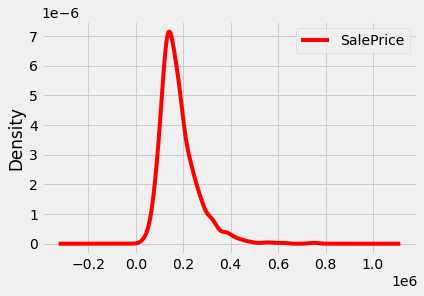

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


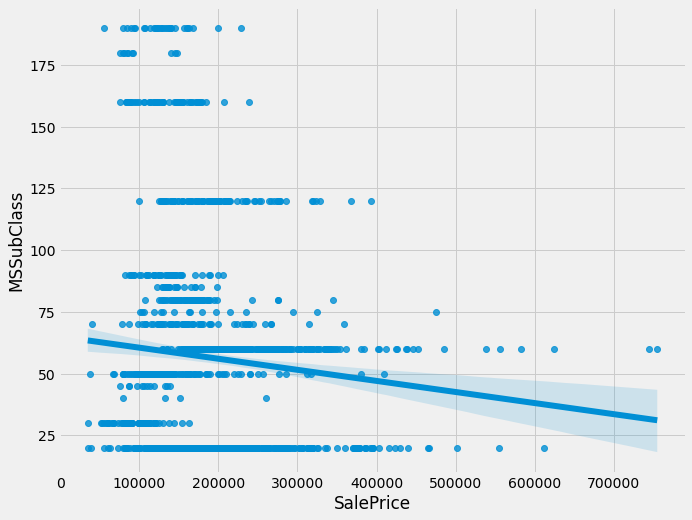

In [124]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
sns.regplot(df['SalePrice'], df['MSSubClass'], data=df)
plt.show()

In [152]:
main_df=df.copy()

In [154]:
test=pd.read_csv('formulatedtest.csv')

In [155]:
test.shape

(1459, 72)

In [156]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NAmes,OldTown,CollgCr,Somerst,Edwards,NridgHt,Gilbert,Sawyer,SawyerW,Mitchel,Pave
0,1461,20,2,80.0,11622,3,0,Feedr,NaN,5,6,1961,1961,VinylSd,VinylSd,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,TA,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,1961.0,1.0,730.0,TA,TA,140,0,0,0,120,0,NaN,MnPrv,0,6,2010,WD,Normal,1,0,0,0,0,0,0,0,0,0,0
1,1462,20,3,81.0,14267,0,0,Norm,NaN,6,6,1958,1958,Wd Sdng,Wd Sdng,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,TA,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,1958.0,1.0,312.0,TA,TA,393,36,0,0,0,0,NaN,NaN,12500,6,2010,WD,Normal,1,0,0,0,0,0,0,0,0,0,0
2,1463,60,3,74.0,13830,0,0,Norm,NaN,5,5,1997,1998,VinylSd,VinylSd,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,Gd,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,1997.0,2.0,482.0,TA,TA,212,34,0,0,0,0,NaN,MnPrv,0,3,2010,WD,Normal,0,0,0,0,0,0,1,0,0,0,0
3,1464,60,3,78.0,9978,0,0,Norm,NaN,6,6,1998,1998,VinylSd,VinylSd,20.0,TA,TA,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,Ex,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,1998.0,2.0,470.0,TA,TA,360,36,0,0,0,0,NaN,NaN,0,6,2010,WD,Normal,0,0,0,0,0,0,1,0,0,0,0
4,1465,120,3,43.0,5005,0,0,Norm,NaN,8,5,1992,1992,HdBoard,HdBoard,0.0,Gd,TA,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,Ex,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,1992.0,2.0,506.0,TA,TA,0,82,0,0,144,0,NaN,NaN,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [157]:
df.drop(['FireplaceQu'], axis=1, inplace=True)

In [164]:
final_df=pd.concat([df,test],axis=0)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [90]:
final_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NAmes,OldTown,CollgCr,Somerst,Edwards,NridgHt,Gilbert,Sawyer,SawyerW,Mitchel,Pave
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,No

In [82]:
final_df.shape

(2919, 78)

In [160]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [161]:
final_df.shape

(2919, 92)

In [162]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NAmes,OldTown,CollgCr,Somerst,Edwards,NridgHt,Gilbert,Sawyer,SawyerW,Mitchel,Pave
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [1]:
"""
from sklearn.model_selection import train_test_split

X=df.drop(columns=['SalePrice'])
Y=df['SalePrice']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30, random_state=42)
"""

"\nfrom sklearn.model_selection import train_test_split\n\nX=df.drop(columns=['SalePrice'])\nY=df['SalePrice']\n\nX_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30, random_state=42)\n"

In [165]:
"""
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_scaled=std.fit_transform(X_train)
"""

In [168]:
"""
X_test_scaled=std.transform(X_test)
"""

In [169]:
"""
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
fit=lr.fit(X_train,y_train)
fit
"""

LinearRegression()

In [170]:

"""predict=fit.predict(X_test)"""

In [2]:
"""print('r2 score : ',fit.score(X_train,y_train))"""

"print('r2 score : ',fit.score(X_train,y_train))"

In [172]:
"""
from sklearn.ensemble import GradientBoostingRegressor
gbg=GradientBoostingRegressor()
"""

In [3]:
"""
fit_gbg=gbg.fit(X_train,y_train)
predict_gbg=fit_gbg.predict(X_test)
print('score',fit_gbg.score(X_train,y_train))
"""

"\nfit_gbg=gbg.fit(X_train,y_train)\npredict_gbg=fit_gbg.predict(X_test)\nprint('score',fit_gbg.score(X_train,y_train))\n"